In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import galsim
import galsim_dataset as GalGenerate

In [2]:
images,_=GalGenerate.get_galaxy(64,0.03,number_start=0,number_stop=81499)

numbers


## Сохрани картинки в фитс

In [10]:
from astropy.table import Table
from astropy.io import fits

hdr = fits.Header()
hdr['DataFrom'] = 'COSMOS'
hdr['Dataset'] = 'Danilov Egor'
hdr['ImNumber'] = 29872
hdr['ImShape'] = 64

empty_primary = fits.PrimaryHDU(header=hdr)
hdus=[fits.ImageHDU(images[i]) for i in range(0,len(images))]
hdul = fits.HDUList([empty_primary]+hdus)
hdul.writeto('Galaxies64.fits')

In [6]:
len(param_records)

29872

In [43]:
df_par=pd.read_csv('galaxies_parameters.zip',compression='zip',index_col=0)  
df_par.head()

,IDENT,bulgefit,fit_dvc_btt,fit_mad_b,fit_mad_s,fit_status,flux,flux_radius,hlr,mag_auto,noise_sigma,sersicfit,use_bulgefit,viable_sersic,zphot
0,52167,[5.77872795e-03 1.96095310e+01 1.00000000e+00 ...,0.037448,0.002725,0.002748,[1 1 1 4 1],13.870001,14.171382,[0.3842748 0. 0. ],23.126625,0.002752,[7.21210624e-03 1.75315713e+01 9.38620061e-01 ...,0,1,1.0190
1,70378,[4.06677774e-03 2.04162254e+01 1.00000000e+00 ...,0.000000,0.002296,0.002167,[1 1 1 1 1],9.095281,13.591013,[0.35865763 0. 0. ],23.618082,0.002463,[6.53487127e-03 1.70895822e+01 4.69743605e-01 ...,0,1,1.0312
2,1007568,[1.16696686e-03 3.03907079e+01 1.00000000e+00 ...,0.019940,0.002698,0.003185,[1 1 1 1 1],4.082829,16.072845,[0.49243971 0. 0. ],24.153313,0.002885,[2.17138371e-03 2.55583606e+01 3.08959347e-01 ...,0,1,1.4328
3,26720,[9.76689433e-02 2.34367997e+01 1.00000000e+00 ...,0.350235,0.004489,0.004106,[1 1 1 1 1],310.784361,15.969330,[0.41822646 0. 0. ],19.844151,0.004105,[1.01607584e-01 2.31481076e+01 1.64348935e+00 ...,0,1,0.3197
4,38156,[2.65429596e-03 2.79480291e+01 1.00000000e+00 ...,0.022316,0.002287,0.002273,[1 1 1 1 1],8.712471,16.333925,[0.48535305 0. 0. ],23.774839,0.002825,[ 2.84735957e-03 2.71117087e+01 1.00088393e+...,0,1,0.4832


# Downscaling for SNR

In [13]:
import cv2

In [45]:
df_par.head()

,IDENT,bulgefit,fit_dvc_btt,fit_mad_b,fit_mad_s,fit_status,flux,flux_radius,hlr,mag_auto,noise_sigma,sersicfit,use_bulgefit,viable_sersic,zphot
0,52167,[5.77872795e-03 1.96095310e+01 1.00000000e+00 ...,0.037448,0.002725,0.002748,[1 1 1 4 1],13.870001,14.171382,[0.3842748 0. 0. ],23.126625,0.002752,[7.21210624e-03 1.75315713e+01 9.38620061e-01 ...,0,1,1.0190
1,70378,[4.06677774e-03 2.04162254e+01 1.00000000e+00 ...,0.000000,0.002296,0.002167,[1 1 1 1 1],9.095281,13.591013,[0.35865763 0. 0. ],23.618082,0.002463,[6.53487127e-03 1.70895822e+01 4.69743605e-01 ...,0,1,1.0312
2,1007568,[1.16696686e-03 3.03907079e+01 1.00000000e+00 ...,0.019940,0.002698,0.003185,[1 1 1 1 1],4.082829,16.072845,[0.49243971 0. 0. ],24.153313,0.002885,[2.17138371e-03 2.55583606e+01 3.08959347e-01 ...,0,1,1.4328
3,26720,[9.76689433e-02 2.34367997e+01 1.00000000e+00 ...,0.350235,0.004489,0.004106,[1 1 1 1 1],310.784361,15.969330,[0.41822646 0. 0. ],19.844151,0.004105,[1.01607584e-01 2.31481076e+01 1.64348935e+00 ...,0,1,0.3197
4,38156,[2.65429596e-03 2.79480291e+01 1.00000000e+00 ...,0.022316,0.002287,0.002273,[1 1 1 1 1],8.712471,16.333925,[0.48535305 0. 0. ],23.774839,0.002825,[ 2.84735957e-03 2.71117087e+01 1.00088393e+...,0,1,0.4832


In [124]:
maxI_4=np.zeros(len(images))
for i,item in enumerate(images):
    maxI_4[i]=(cv2.resize(item, dsize=(16, 16), interpolation=cv2.INTER_CUBIC)).max()

In [125]:
SNR=maxI_4/df_par.noise_sigma.values

In [126]:
df_par['SNR']=SNR

In [127]:
df_par.head()

,IDENT,bulgefit,fit_dvc_btt,fit_mad_b,fit_mad_s,fit_status,flux,flux_radius,hlr,mag_auto,noise_sigma,sersicfit,use_bulgefit,viable_sersic,zphot,SNR
0,52167,[5.77872795e-03 1.96095310e+01 1.00000000e+00 ...,0.037448,0.002725,0.002748,[1 1 1 4 1],13.870001,14.171382,[0.3842748 0. 0. ],23.126625,0.002752,[7.21210624e-03 1.75315713e+01 9.38620061e-01 ...,0,1,1.0190,9.329016
1,70378,[4.06677774e-03 2.04162254e+01 1.00000000e+00 ...,0.000000,0.002296,0.002167,[1 1 1 1 1],9.095281,13.591013,[0.35865763 0. 0. ],23.618082,0.002463,[6.53487127e-03 1.70895822e+01 4.69743605e-01 ...,0,1,1.0312,6.389424
2,1007568,[1.16696686e-03 3.03907079e+01 1.00000000e+00 ...,0.019940,0.002698,0.003185,[1 1 1 1 1],4.082829,16.072845,[0.49243971 0. 0. ],24.153313,0.002885,[2.17138371e-03 2.55583606e+01 3.08959347e-01 ...,0,1,1.4328,4.314875
3,26720,[9.76689433e-02 2.34367997e+01 1.00000000e+00 ...,0.350235,0.004489,0.004106,[1 1 1 1 1],310.784361,15.969330,[0.41822646 0. 0. ],19.844151,0.004105,[1.01607584e-01 2.31481076e+01 1.64348935e+00 ...,0,1,0.3197,123.454781
4,38156,[2.65429596e-03 2.79480291e+01 1.00000000e+00 ...,0.022316,0.002287,0.002273,[1 1 1 1 1],8.712471,16.333925,[0.48535305 0. 0. ],23.774839,0.002825,[ 2.84735957e-03 2.71117087e+01 1.00088393e+...,0,1,0.4832,6.311334


In [132]:
df_par.to_csv('parameters.csv')

In [50]:
SNR.max()

6637.673051684426

In [51]:
SNR.min()

2.0163572602396984

(0.0, 100.0)

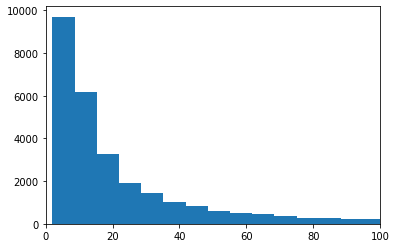

In [52]:
plt.hist(SNR,bins=1000)
plt.xlim(0,100)

In [57]:
import seaborn as sns

In [95]:
inf=0
sup=100
SNR_lim=SNR[(SNR>=inf) & (SNR<=sup)]
SNR_lim.sort()
len(SNR_lim)

27259

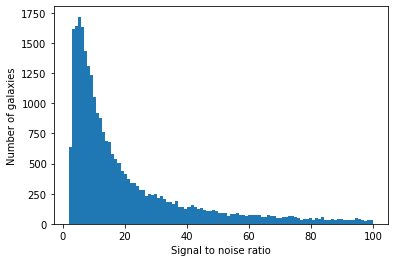

In [96]:
plt.hist(SNR_lim,bins=100)
plt.xlabel('Signal to noise ratio')
plt.ylabel('Number of galaxies')
plt.show()

In [112]:
p = 1. * np.arange(len(SNR_lim))

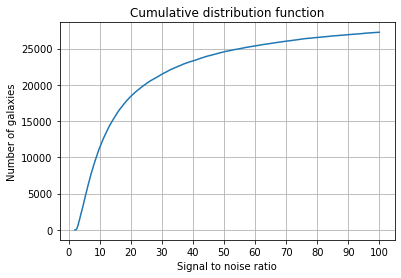

In [121]:
plt.plot(SNR_lim,p)
plt.grid()
plt.title('Cumulative distribution function')
plt.xlabel('Signal to noise ratio')
plt.ylabel('Number of galaxies')
plt.xticks(np.arange(0,110,10))
plt.savefig('CDF_for_SNR.jpg',dpi=500)
plt.show()

In [23]:
maxI_4.shape

(29873,)

In [15]:
Flux_downscaled_4

0.02567659849592019

In [30]:
SNR=(df_par.flux/df_par.noise_sigma/np.pi/df_par.flux_radius**2).values
SNR_ph=SNR[np.where((SNR>0) & (SNR<150))]

(0.0, 100.0)

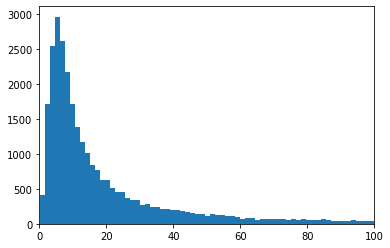

In [31]:
plt.hist(SNR_ph,bins=100)
plt.xlim(0,100)

In [29]:
SNR_ph.shape

(8036,)

In [ ]:
hdr = fits.Header()
hdr['DataFrom'] = 'COSMOS'
hdr['Dataset'] = 'Danilov Egor'
hdr['ImNumber'] = len(images)
hdr['ImShape'] = '64

hdr['COMMENT'] = '''First is features table of galaxies presented. Then 7459 hdu files are images of galaxies in the same order as instances in the features table. Features are the same as presented for COSMOS galaxies in the original catalogue'''
empty_primary = fits.PrimaryHDU(header=hdr)
hdus=[fits.ImageHDU(images[i]) for i in range(0,len(images))]
features=fits.BinTableHDU(Table(Features_dataset.to_numpy(), names=Features_dataset.columns))
hdul = fits.HDUList([empty_primary]+[features]+hdus)
hdul.writeto('Dataset.fits')

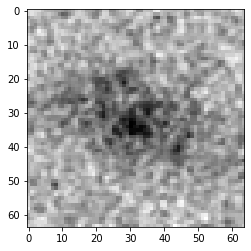

In [6]:
plt.imshow(images[-1],cmap='gray_r')